In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import kagglehub
import os

In [3]:
# Download latest version
path = kagglehub.dataset_download("benjaminwarner/resized-2015-2019-blindness-detection-images")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'resized-2015-2019-blindness-detection-images' dataset.
Path to dataset files: /kaggle/input/resized-2015-2019-blindness-detection-images


Next Cell Should not be run.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#!cp -r /root/.cache/kagglehub/datasets/benjaminwarner/resized-2015-2019-blindness-detection-images/ /content/drive/MyDrive/
#dataset_path = "/content/drive/MyDrive/resized-2015-2019-blindness-detection-images"

In [12]:
dataset_path = "/kaggle/input/resized-2015-2019-blindness-detection-images"

# List subdirectories
for root, dirs, files in os.walk(dataset_path):
    print("📂", root)
    print("   → Folders:", dirs[:])
    print("   → Files:", files[:])
    break


📂 /kaggle/input/resized-2015-2019-blindness-detection-images
   → Folders: ['labels', 'resized test 15', 'resized train 19', 'resized train 15', 'resized test 19']
   → Files: []


In [9]:
for folder in os.listdir(dataset_path):
    #print("I am the folder",folder)
    folder_path = os.path.join(dataset_path, folder)
    #print("folder path",folder_path)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        print(f"📁 {folder} → {len(files)} files")
        print("   Examples:", files[:5])


📁 labels → 4 files
   Examples: ['trainLabels19.csv', 'testImages19.csv', 'trainLabels15.csv', 'testLabels15.csv']
📁 resized test 15 → 53576 files
   Examples: ['10795_left.jpg', '33811_right.jpg', '7332_left.jpg', '44098_right.jpg', '42276_right.jpg']
📁 resized train 19 → 3662 files
   Examples: ['9bf060db8376.jpg', '75238d945315.jpg', '9f4132bd6ed6.jpg', '2fb3a8606a77.jpg', 'cd54d022e37d.jpg']
📁 resized train 15 → 35126 files
   Examples: ['18452_left.jpg', '32834_left.jpg', '23236_right.jpg', '3419_left.jpg', '28938_left.jpg']
📁 resized test 19 → 1928 files
   Examples: ['93c1af8b625c.jpg', 'f444cd113883.jpg', '9d9de8c9afb5.jpg', '069ebdb1023d.jpg', 'ec353d42359d.jpg']


In [17]:
labels_path = os.path.join(dataset_path, "labels", "trainLabels15.csv")

# Read label file
labels_df = pd.read_csv(labels_path)
print("🔹 Shape:", labels_df.shape)
print(labels_df.head())

🔹 Shape: (35126, 2)
      image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1


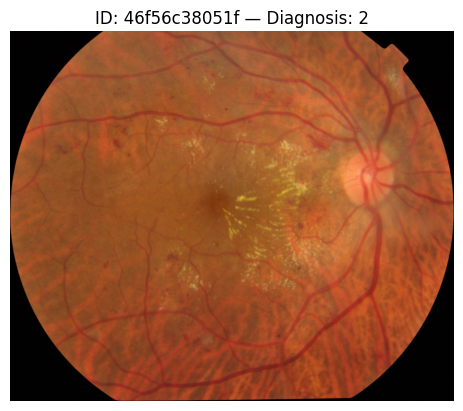

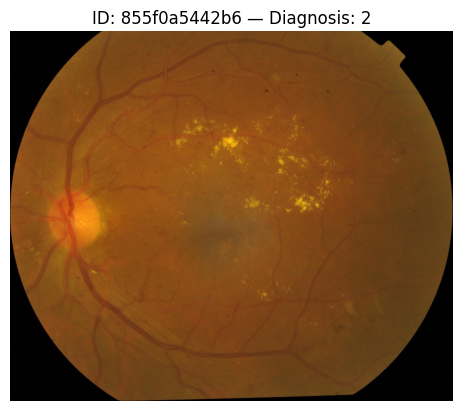

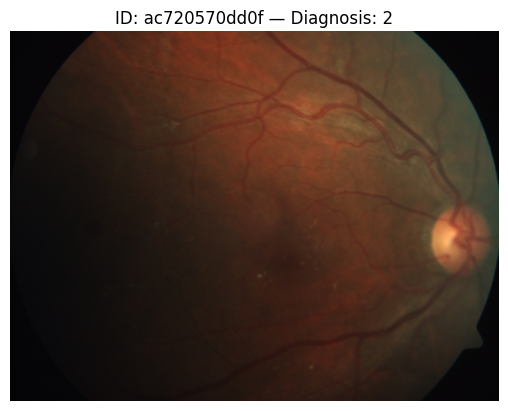

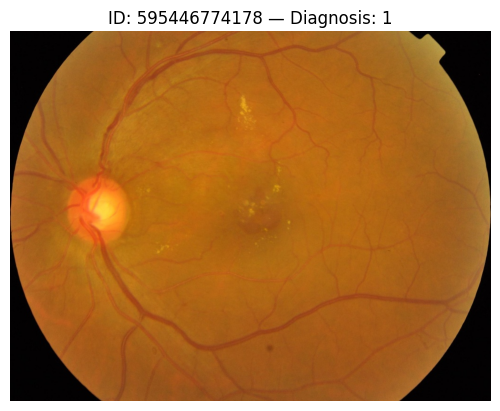

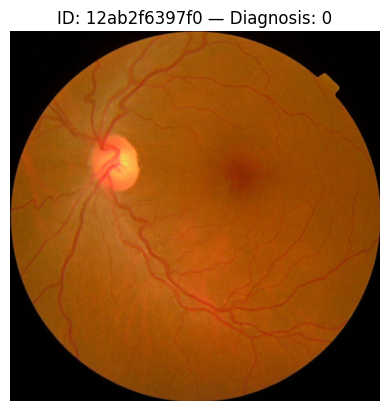

In [19]:
base_path = "/kaggle/input/resized-2015-2019-blindness-detection-images"
train_path = os.path.join(base_path, "resized train 19")
labels_path = os.path.join(base_path, "labels", "trainLabels19.csv")

labels_df = pd.read_csv(labels_path)

# Sample a few random rows
sample_rows = labels_df.sample(5, random_state=12)

for _, row in sample_rows.iterrows():
    image_file = f"{row['id_code']}.jpg"
    image_path = os.path.join(train_path, image_file)

    if os.path.exists(image_path):
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f"ID: {row['id_code']} — Diagnosis: {row['diagnosis']}")
        plt.axis("off")
        plt.show()
    else:
        print("⚠️ Not found:", image_path)


In [ ]:
print(sample_rows)

           id_code  diagnosis
2059  90960ddf4d14          0
1105  4e0656629d02          1
818   3b018e8b7303          3
1237  55eb405ec71e          4
463   207dd0487264          0


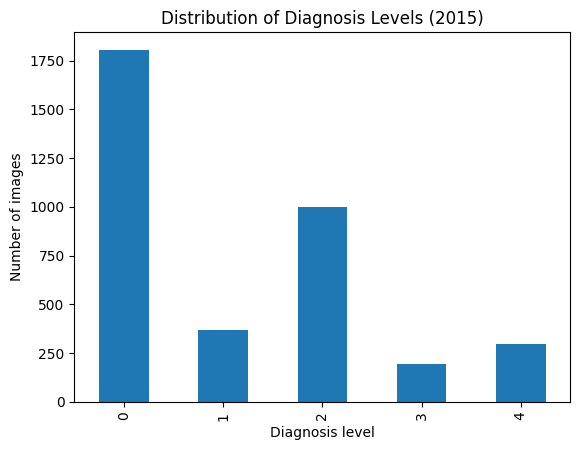

In [20]:
labels_df['diagnosis'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Diagnosis Levels (2015)")
plt.xlabel("Diagnosis level")
plt.ylabel("Number of images")
plt.show()


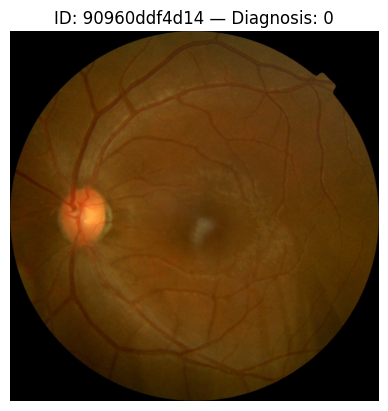

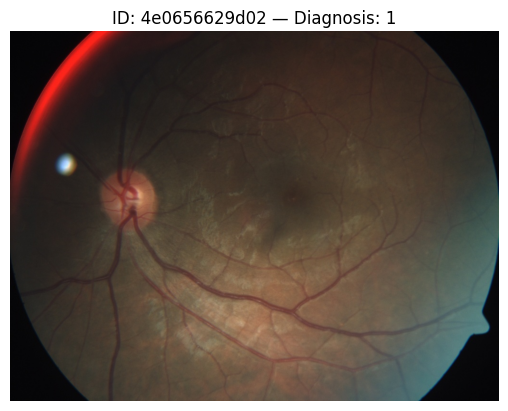

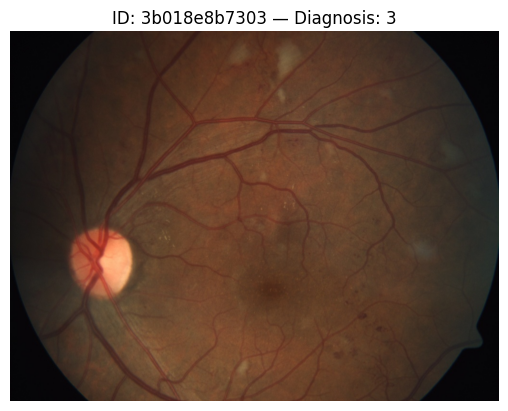

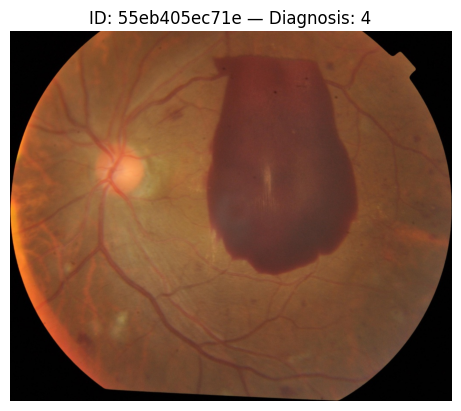

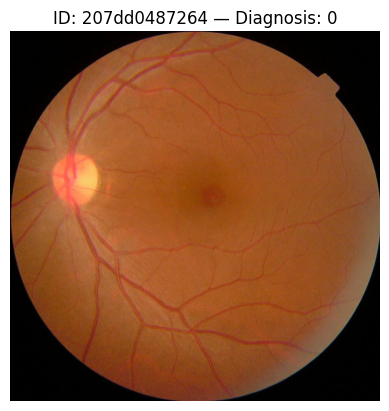

In [25]:
train_path = os.path.join(base_path, "resized train 19")
labels_path = os.path.join(base_path, "labels", "trainLabels19.csv")

labels_df = pd.read_csv(labels_path)

# Sample a few random rows
sample_rows = labels_df.sample(5, random_state=42)

for _, row in sample_rows.iterrows():
    image_file = f"{row['id_code']}.jpg"
    image_path = os.path.join(train_path, image_file)

    if os.path.exists(image_path):
        img = Image.open(image_path)
        plt.imshow(img)
        plt.title(f"ID: {row['id_code']} — Diagnosis: {row['diagnosis']}")
        plt.axis("off")
        plt.show()
    else:
        print("Not found:", image_path)

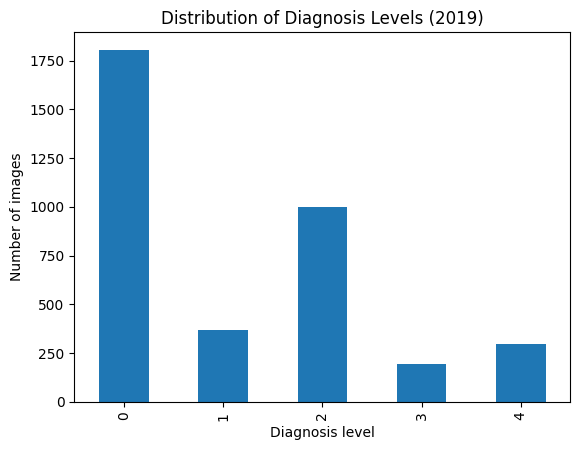

In [28]:
labels_df['diagnosis'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Diagnosis Levels (2019)")
plt.xlabel("Diagnosis level")
plt.ylabel("Number of images")
plt.show()

In [24]:
labels_df

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0
